In [ ]:
Introduction
The COVID-19 pandemic has profoundly impacted global health systems, economies, and societies. Since its emergence, countries around the world have experienced varying levels of infection rates, mortality, and recovery. These differences have been shaped by multiple factors, including healthcare infrastructure, population demographics, vaccination rates, and socioeconomic conditions. To better understand and respond to the ongoing effects of COVID-19, there is a need for comprehensive data analysis that explores patterns, trends, and correlations across different regions and indicators.
Project Description
This project presents a global data-driven analysis of the COVID-19 pandemic using country-level data on infections, deaths, vaccination progress, demographics, and socioeconomic factors. By leveraging visualizations, statistical summaries, and correlation analysis, the project aims to uncover insights about how the pandemic evolved globally and regionally. Special attention is given to differences in mortality rates, the impact of vaccination, and the role of demographic and economic variables in shaping pandemic outcomes. The analysis supports evidence-based recommendations for future preparedness and policy interventions.
Problem Statement
Despite widespread data availability, significant disparities remain in how countries experienced and responded to the COVID-19 pandemic. Understanding these variations is crucial for improving global public health strategies, especially in low-resource settings. There is a pressing need to analyze these disparities through a unified framework that integrates health, demographic, and socioeconomic data. This project addresses the challenge of identifying and interpreting global patterns in COVID-19 outcomes to guide targeted interventions and equitable resource allocation.
Main Objectives
To analyze and visualize the global distribution and progression of COVID-19 cases, deaths, and vaccination efforts across countries and continents
To examine the influence of demographic and socioeconomic factors (e.g., age structure, GDP per capita, population density) on COVID-19 outcomes such as fatality rate and vaccination coverage.
Despite widespread data availability, significant disparities remain in how countries experienced and responded to the COVID-19 pandemic. Understanding these variations is crucial for improving global public health strategies, especially in low-resource settings. There is a pressing need to analyze these disparities through a unified framework that integrates health, demographic, and socioeconomic data. This project addresses the challenge of identifying and interpreting global patterns in COVID-19 outcomes to guide targeted interventions and equitable resource allocation.
Main Objectives
To analyze and visualize the global distribution and progression of COVID-19 cases, deaths, and vaccination efforts across countries and continents.
To examine the influence of demographic and socioeconomic factors (e.g., age structure, GDP per capita, population density) on COVID-19 outcomes such as fatality rate and vaccination coverage.
To provide actionable recommendations for improving healthcare preparedness, vaccination equity, and pandemic response strategies based on identified trends and correlations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('updated_with_dates.csv')
print(df)
print(f'Data colums\n', df.columns)
print(f'Data head\n', df.head)

            Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN   

     TotalDeaths  NewDeaths

In [3]:
print(f'Identify missing values\n', df.isnull().sum())
clean_data = df.dropna() #Remove rows with any missing value
print(clean_data)
print(f'\nAfter cleaning:')
print(clean_data.isnull().sum())

Identify missing values
 Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
Date                  0
dtype: int64
   Country/Region      Continent   Population  TotalCases  NewCases  \
5          Mexico  North America  129066160.0      462690    6590.0   
28        Bolivia  South America   11688459.0       86423    1282.0   
72       S. Korea           Asia   51273732.0       14519      20.0   

    TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
5       50517.0      819.0        308848.0        4140.0     103325.0   
28       3465.0       80.0         27373.0         936.0      55585.0   
72        303.0        1.0         13543.0        

In [6]:
import pandas as pd

# Generate a list of dates from Jan 22 to Jul 27, 2020
date_list = pd.date_range(start="2020-01-22", end="2020-08-17")

# Ensure the number of rows in df matches number of dates
if len(date_list) == len(df):
    df["Date"] = date_list
    df.to_csv("how_i_added_new_date.csv", index=False)
    print("✅ Date column added and file saved.")
else:
    print("❌ Mismatch: DataFrame rows and date_list length are not equal.")



✅ Date column added and file saved.


In [4]:
#filter countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
filtered_df = df[df['Country/Region'].isin(countries_of_interest)].copy()

# Step 2: Drop rows where the 'Date' column is missing
filtered_df = filtered_df.dropna(subset=['Date'])

# Step 3: Fill missing numeric values using interpolation + backfill
numeric_cols = filtered_df.select_dtypes(include=["float64", "int64"]).columns
filtered_df.loc[:, numeric_cols] = filtered_df[numeric_cols].interpolate().fillna(method='bfill')

print(filtered_df)

   Country/Region      Continent    Population  TotalCases  NewCases  \
0             USA  North America  3.311981e+08     5032179       NaN   
2           India           Asia  1.381345e+09     2025409       NaN   
61          Kenya         Africa  5.388116e+07       24411       NaN   

    TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0      162804.0        NaN       2576668.0           NaN    2292707.0   
2       41638.0        NaN       1377384.0           NaN     606387.0   
61        399.0        NaN         10444.0           NaN      13568.0   

    Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0            18296.0           15194.0          492.0  63139605.0   
2             8944.0            1466.0           30.0  22149351.0   
61              44.0             453.0            7.0    335318.0   

    Tests/1M pop      WHO Region        Date  
0       190640.0        Americas  2020-01-22  
2        16035.0  South-EastAsia  2020-01-24  


In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Country/Region              object
Continent                   object
Population                 float64
TotalCases                   int64
NewCases                   float64
TotalDeaths                float64
NewDeaths                  float64
TotalRecovered             float64
NewRecovered               float64
ActiveCases                float64
Serious,Critical           float64
Tot Cases/1M pop           float64
Deaths/1M pop              float64
TotalTests                 float64
Tests/1M pop               float64
WHO Region                  object
Date                datetime64[ns]
dtype: object


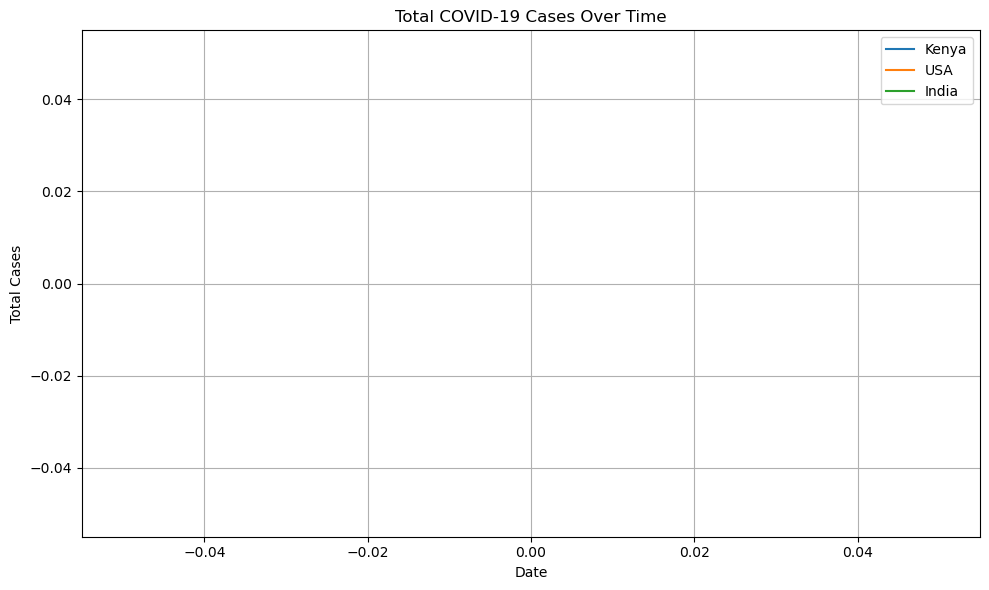

In [26]:
import matplotlib.pyplot as plt

# Make sure filtered_df is correctly filtered before this block
plt.figure(figsize=(10, 6))

for country in countries_of_interest:
    # ✅ Filter correctly from filtered_df
    country_data = filtered_df[filtered_df['Country/Region'] == country]

    # ✅ Proper use of plt.plot (function call, not assignment)
    plt.plot(country_data['Date'], country_data['TotalCases'], label=country)

# Labels and styling
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


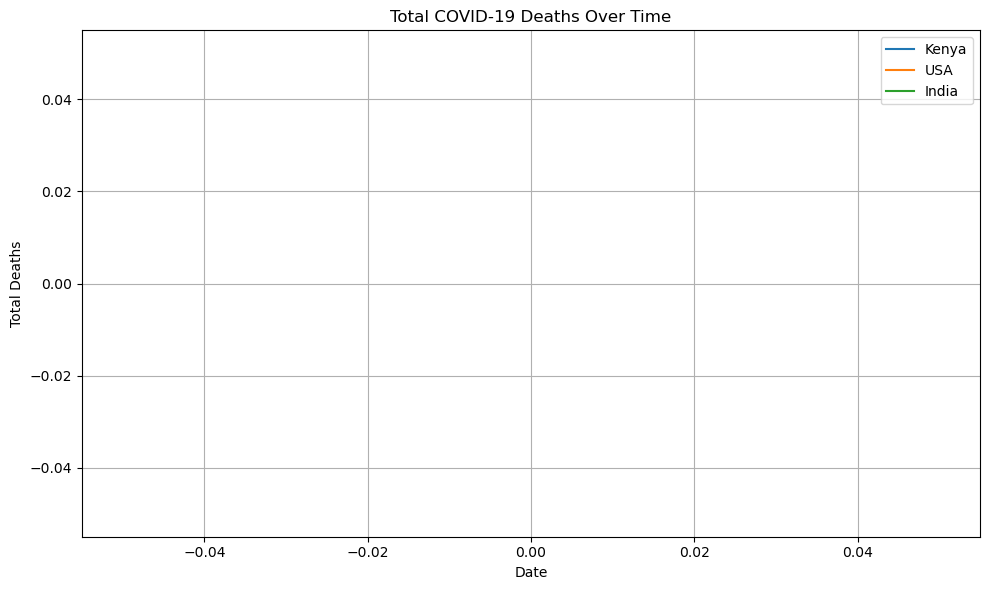

In [25]:

# Step 4: Plot total deaths over time
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['TotalDeaths'], label=country)

# Step 5: Style and show the plot
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


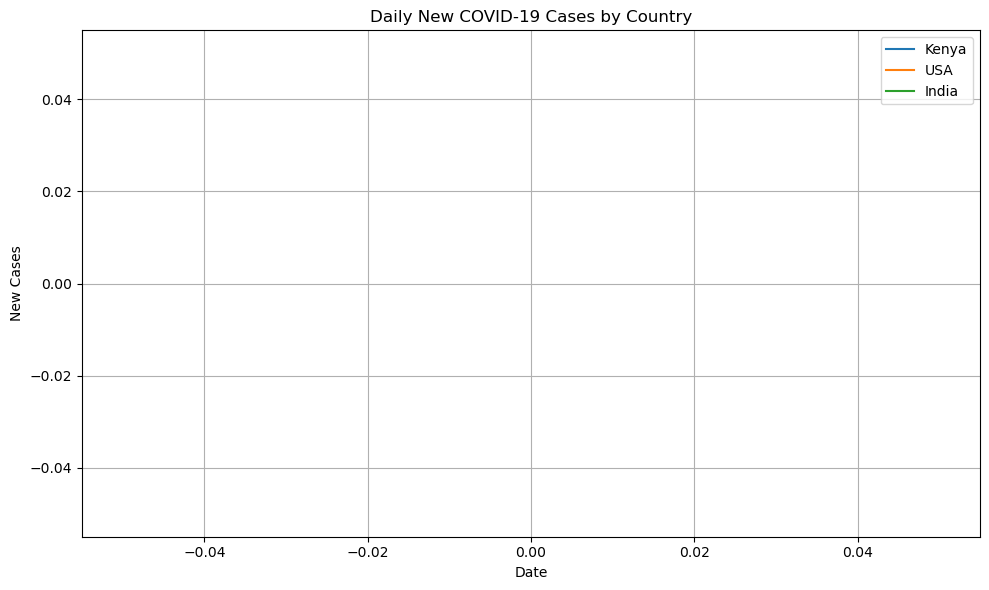

In [27]:
# Plot daily new cases
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['NewCases'], label=country)

# Step 5: Styling
plt.title('Daily New COVID-19 Cases by Country')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print(filtered_df[['Country/Region', 'Date', 'NewCases']].head(20))
print(filtered_df['NewCases'].describe())


   Country/Region        Date  NewCases
0             USA  2020-01-22       NaN
2           India  2020-01-24       NaN
61          Kenya  2020-03-23       NaN
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: NewCases, dtype: float64


In [23]:
# Convert NewCases to numeric (force invalid strings to NaN)
filtered_df['NewCases'] = pd.to_numeric(filtered_df['NewCases'], errors='coerce')
filtered_df['NewCases'] = filtered_df['NewCases'].fillna(0)  # or use interpolate()
filtered_df = filtered_df[filtered_df['NewCases'] > 0]


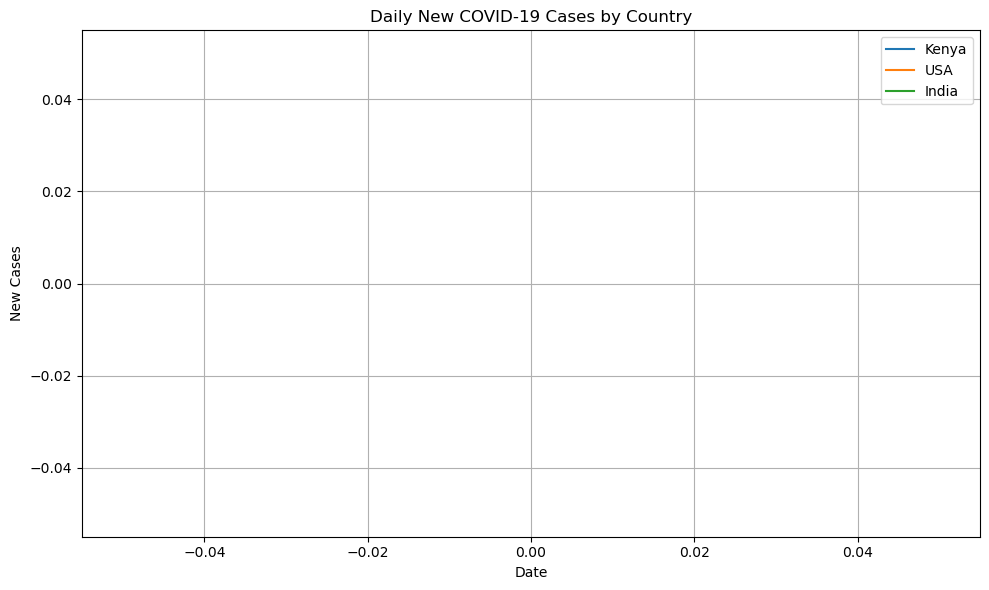

In [24]:
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['NewCases'], label=country)

plt.title('Daily New COVID-19 Cases by Country')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()